In [1]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [2]:
import csv
import pandas as pd
import plotly.express as px

df=pd.read_csv("data.csv")
v_list=df["Velocity"].tolist()
e_list=df["Escaped"].tolist()

fig=px.scatter(x=v_list,y=e_list)
fig.show()

In [3]:
import numpy as np

v_array=np.array(v_list)
e_array=np.array(e_list)
m,c=np.polyfit(v_array,e_array,1)
y=[]

for x in v_array:
  y_value=m*x+c
  y.append(y_value)
  
fig=px.scatter(x=v_array,y=e_array)
fig.update_layout(shapes=[dict(type="line",x0=min(v_array),x1=max(v_array),y0=min(y),y1=max(y))])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



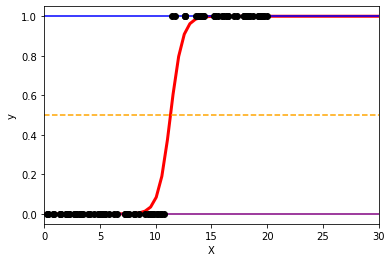

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X=np.reshape(v_list,(len(v_list),1))
Y=np.reshape(e_list,(len(e_list),1))

lr=LogisticRegression()
lr.fit(X,Y)

plt.figure()
plt.scatter(X.ravel(),Y,color="black",zorder=20)

def model(x):
  return 1/(1+np.exp(-x))

X_test=np.linspace(0,100,200)

chances=model(X_test*lr.coef_+lr.intercept_).ravel()
plt.plot(X_test,chances,color="red",linewidth=3)

plt.axhline(y=0,color="purple",linestyle="-")
plt.axhline(y=1,color="blue",linestyle="-")
plt.axhline(y=0.5,color="orange",linestyle="--")
plt.axvline(x=X_test[165],color="blue",linestyle="--")

plt.ylabel("y")
plt.xlabel("X")
plt.xlim(0,30)

plt.show()

In [6]:
velocity=float(input("enter the velocity:"))
escape=model(velocity*lr.coef_+lr.intercept_).ravel()[0]

if escape <= 0.01:
  print("the object will not escape the orbit :(")

elif escape >= 1:
  print("the object will escape the orbit :)")

elif escape < 0.5:
  print("the object might not escape the orbit :O")

else:
  print("the object may escape the orbit >:|")

enter the velocity:0
the object will not escape the orbit :(
